<a href="https://colab.research.google.com/github/vidyap-xgboost/Mini_Projects/blob/master/twitter_data_twint_sweetviz_texthero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Scraping Data using Twint

Let's collect data from twitter using [twint](https://github.com/twintproject/twint) library.

**Question 1:** Why are we using **twint** instead of **Twitter's Official API**?

**Ans:** Because twint requires no authentication, no API, and importantly no limits.

In [ ]:
# For more ways to install this library, please visit the above mentioned link.

!pip3 install twint

In [2]:
import twint

# Create a function to scrape a user's account.
def scrape_user():
	print ("Fetching Tweets")
	c = twint.Config()
	# choose username (optional)
	c.Username = input('Username: ') # I used a different account for this project. Changed the username to protect the user's privacy.
	# choose beginning time (narrow results)
	c.Since = input('Date (format: "%Y-%m-%d %H:%M:%S"): ')
	# no idea, but makes the csv format properly
	c.Store_csv = True
	# file name to be saved as
	c.Output = input('File name: ')
	twint.run.Search(c)

In [ ]:
# run the above function
scrape_user()
print('Scraping Done!')

# 1. Reading Data using Pandas

In [4]:
# pandas to read our csv file
import pandas as pd

In [5]:
# save the csv file into a dataframe 'df'
df = pd.read_csv('/content/elonmusk.csv',low_memory=False, parse_dates=[['date', 'time']])

In [6]:
# make a copy if you need so that the changes made in original df doesn't affect the copy
df_copy = df.copy(deep=True)

In [7]:
print('-----------------------------------------------------------------------------')
print('Dataframe:')
print('-----------------------------------------------------------------------------')
# check the whole df
display(df)
print('-----------------------------------------------------------------------------')
print('Dataframe Info: ')
print('-----------------------------------------------------------------------------')
# check an overview of the df
display(df.info())
print('-----------------------------------------------------------------------------')
print('Dataframe details: ')
print('-----------------------------------------------------------------------------')
# gives out quick analysis, notice the max retweets_count and min retweets_count and so on
display(df.describe())

-----------------------------------------------------------------------------
Dataframe:
-----------------------------------------------------------------------------


,date_time,id,conversation_id,created_at,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,2020-07-13 02:26:31,1282501634166124549,1282472800041578496,1594607191000,UTC,44196397,elonmusk,Elon Musk,NaN,"Yes, in plan. Superchargers and public high po...","['teslatn', 'jgrano305', 'teslaratiteam', 'tes...",[],[],174,79,1255,[],[],https://twitter.com/elonmusk/status/1282501634...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
1,2020-07-13 02:21:36,1282500394619301888,1282472800041578496,1594606896000,UTC,44196397,elonmusk,Elon Musk,NaN,👀,"['chrisjcav', 'jgrano305', 'teslaratiteam', 't...",[],[],80,31,755,[],[],https://twitter.com/elonmusk/status/1282500394...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
2,2020-07-13 02:20:20,1282500077995520002,1282472800041578496,1594606820000,UTC,44196397,elonmusk,Elon Musk,NaN,I think so,"['jaminwestby', 'teslaownerssv', 'jgrano305', ...",[],[],77,33,889,[],[],https://twitter.com/elonmusk/status/1282500077...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
3,2020-07-13 02:19:54,1282499968331218944,1282472800041578496,1594606794000,UTC,44196397,elonmusk,Elon Musk,NaN,Doing range testing now. Number will be signif...,"['jgrano305', 'teslaratiteam', 'teslarati']",[],[],58,87,1035,[],[],https://twitter.com/elonmusk/status/1282499968...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
4,2020-07-13 02:17:39,1282499399562588160,1282472800041578496,1594606659000,UTC,44196397,elonmusk,Elon Musk,NaN,We have reduced pricing on Model Y LR dual mot...,"['jgrano305', 'teslaratiteam', 'teslarati']",[],[],93,126,1275,[],[],https://twitter.com/elonmusk/status/1282499399...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2018-01-31 23:31:46,958845290022289408,958836888592310273,1517441506000,UTC,44196397,elonmusk,Elon Musk,NaN,From the world’s leading experts in zombie def...,"['thewalkingdead', 'chandlerriggs']",[],[],90,634,10138,[],[],https://twitter.com/elonmusk/status/9588452900...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
7039,2018-01-31 22:11:13,958825021098491904,958813616387403776,1517436673000,UTC,44196397,elonmusk,Elon Musk,NaN,Now that’s a real flamethrower …,['spacex'],[],[],508,2604,37883,[],[],https://twitter.com/elonmusk/status/9588250210...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
7040,2018-01-31 05:12:26,958568634917556224,958568634917556224,1517375546000,UTC,44196397,elonmusk,Elon Musk,NaN,https://m.youtube.com/watch?v=6l6vqPUM_FE …,[],['https://m.youtube.com/watch?v=6l6vqPUM_FE'],[],1234,3020,22941,[],[],https://twitter.com/elonmusk/status/9585686349...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk'}]",NaN,NaN,NaN,NaN
7041,2018-01-31 00:43:09,958500867832975361,958500867832975361,1517359389000,UTC,44196397,elonmusk,Elon Musk,NaN,Falcon Heavy in foreground on Launch Complex 3...,[],['https://www.instagram.com/p/BemBlnSAACd/'],[],485,1987,15930,[],[],https://twitter.com/elonmusk/status/9585008678...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk'}]",NaN,NaN,NaN,NaN


-----------------------------------------------------------------------------
Dataframe Info: 
-----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_time        7043 non-null   datetime64[ns]
 1   id               7043 non-null   int64         
 2   conversation_id  7043 non-null   int64         
 3   created_at       7043 non-null   int64         
 4   timezone         7043 non-null   object        
 5   user_id          7043 non-null   int64         
 6   username         7043 non-null   object        
 7   name             7043 non-null   object        
 8   place            0 non-null      float64       
 9   tweet            7043 non-null   object        
 10  mentions         7043 non-null   object        
 11  urls             7043 non-

None

-----------------------------------------------------------------------------
Dataframe details: 
-----------------------------------------------------------------------------


,id,conversation_id,created_at,user_id,place,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,7.043000e+03,7.043000e+03,7.043000e+03,7043.0,0.0,7043.000000,7043.000000,7.043000e+03,7043.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.134330e+18,1.130901e+18,1.559280e+12,44196397.0,NaN,580.108902,2449.357518,2.233034e+04,0.008093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.303782e+16,1.057630e+17,2.218194e+10,0.0,NaN,1903.893167,11425.329340,6.631003e+04,0.089603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,9.583713e+17,1.659576e+09,1.517328e+12,44196397.0,NaN,4.000000,4.000000,1.890000e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.055350e+18,1.054165e+18,1.540450e+12,44196397.0,NaN,52.000000,47.000000,1.141000e+03,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.134114e+18,1.132220e+18,1.559229e+12,44196397.0,NaN,109.000000,124.000000,2.759000e+03,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.219639e+18,1.217987e+18,1.579620e+12,44196397.0,NaN,406.000000,808.000000,1.455100e+04,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.282502e+18,1.282473e+18,1.594607e+12,44196397.0,NaN,49543.000000,384402.000000,1.682582e+06,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# I don't need these columns, so dropping them. You can keep them if you want.
drop_list = ['id','conversation_id','created_at','name','timezone','user_id','cashtags','place','quote_url','near','geo','source','user_rt_id','user_rt','retweet_id','retweet_date','translate','trans_src','trans_dest','video','retweet']
df = df.drop(columns=drop_list)

In [9]:
# have a look again.
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date_time       7043 non-null   datetime64[ns]
 1   username        7043 non-null   object        
 2   tweet           7043 non-null   object        
 3   mentions        7043 non-null   object        
 4   urls            7043 non-null   object        
 5   photos          7043 non-null   object        
 6   replies_count   7043 non-null   int64         
 7   retweets_count  7043 non-null   int64         
 8   likes_count     7043 non-null   int64         
 9   hashtags        7043 non-null   object        
 10  link            7043 non-null   object        
 11  reply_to        7043 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 660.4+ KB


None

In [10]:
# just in case texthero cant remove URLs
df['tweet'] = df['tweet'].str.replace('http\S+|www.\S+', '',case=False)

In [11]:
df

,date_time,username,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,reply_to
0,2020-07-13 02:26:31,elonmusk,"Yes, in plan. Superchargers and public high po...","['teslatn', 'jgrano305', 'teslaratiteam', 'tes...",[],[],174,79,1255,[],https://twitter.com/elonmusk/status/1282501634...,"[{'user_id': '44196397', 'username': 'elonmusk..."
1,2020-07-13 02:21:36,elonmusk,👀,"['chrisjcav', 'jgrano305', 'teslaratiteam', 't...",[],[],80,31,755,[],https://twitter.com/elonmusk/status/1282500394...,"[{'user_id': '44196397', 'username': 'elonmusk..."
2,2020-07-13 02:20:20,elonmusk,I think so,"['jaminwestby', 'teslaownerssv', 'jgrano305', ...",[],[],77,33,889,[],https://twitter.com/elonmusk/status/1282500077...,"[{'user_id': '44196397', 'username': 'elonmusk..."
3,2020-07-13 02:19:54,elonmusk,Doing range testing now. Number will be signif...,"['jgrano305', 'teslaratiteam', 'teslarati']",[],[],58,87,1035,[],https://twitter.com/elonmusk/status/1282499968...,"[{'user_id': '44196397', 'username': 'elonmusk..."
4,2020-07-13 02:17:39,elonmusk,We have reduced pricing on Model Y LR dual mot...,"['jgrano305', 'teslaratiteam', 'teslarati']",[],[],93,126,1275,[],https://twitter.com/elonmusk/status/1282499399...,"[{'user_id': '44196397', 'username': 'elonmusk..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2018-01-31 23:31:46,elonmusk,From the world’s leading experts in zombie def...,"['thewalkingdead', 'chandlerriggs']",[],[],90,634,10138,[],https://twitter.com/elonmusk/status/9588452900...,"[{'user_id': '44196397', 'username': 'elonmusk..."
7039,2018-01-31 22:11:13,elonmusk,Now that’s a real flamethrower …,['spacex'],[],[],508,2604,37883,[],https://twitter.com/elonmusk/status/9588250210...,"[{'user_id': '44196397', 'username': 'elonmusk..."
7040,2018-01-31 05:12:26,elonmusk,…,[],['https://m.youtube.com/watch?v=6l6vqPUM_FE'],[],1234,3020,22941,[],https://twitter.com/elonmusk/status/9585686349...,"[{'user_id': '44196397', 'username': 'elonmusk'}]"
7041,2018-01-31 00:43:09,elonmusk,Falcon Heavy in foreground on Launch Complex 3...,[],['https://www.instagram.com/p/BemBlnSAACd/'],[],485,1987,15930,[],https://twitter.com/elonmusk/status/9585008678...,"[{'user_id': '44196397', 'username': 'elonmusk'}]"


# 2. Install and Import TextHero

Here, we will be using [TextHero](https://github.com/jbesomi/texthero), a python package to work efficiently and quickly with text data. You can think of texhero as scikit-learn for text-based dataset.

**Question 2:** Why are we using TextHero instead of doing it from scratch using libraries like Gensim or other tools?

**Ans:** TextHero automates the cleaning process with one method, which is pretty effective. If the text needs to be cleaned further, we can do so by manually writing code to remove those unwanted words. In the backend, it uses libraries like Spacy, Gensim, tqdm,regex, nltk. So you don't have to import all those separately when you use TextHero.

In [ ]:
# Check the above link for other installation instructions.

!pip install texthero

In [ ]:
# import texthero

import texthero as hero

# 3. TextHero for quick cleaning of **raw** text data.

In [14]:
# let's do text preprocessing
from texthero import preprocessing

# creating a custom pipeline to preprocess the raw text we have
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                  #  , preprocessing.remove_digits # you can uncomment this if you want to remove digits as well.
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_stopwords
                   , preprocessing.remove_whitespace
                   , preprocessing.stem]

# simply call clean() method to clean the raw text in 'tweet' col and pass the custom_pipeline to pipeline argument
df['clean_tweet'] = hero.clean(df['tweet'], pipeline = custom_pipeline)

In [15]:
df

,date_time,username,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,reply_to,clean_tweet
0,2020-07-13 02:26:31,elonmusk,"Yes, in plan. Superchargers and public high po...","['teslatn', 'jgrano305', 'teslaratiteam', 'tes...",[],[],174,79,1255,[],https://twitter.com/elonmusk/status/1282501634...,"[{'user_id': '44196397', 'username': 'elonmusk...",yes plan supercharg public high power wall con...
1,2020-07-13 02:21:36,elonmusk,👀,"['chrisjcav', 'jgrano305', 'teslaratiteam', 't...",[],[],80,31,755,[],https://twitter.com/elonmusk/status/1282500394...,"[{'user_id': '44196397', 'username': 'elonmusk...",
2,2020-07-13 02:20:20,elonmusk,I think so,"['jaminwestby', 'teslaownerssv', 'jgrano305', ...",[],[],77,33,889,[],https://twitter.com/elonmusk/status/1282500077...,"[{'user_id': '44196397', 'username': 'elonmusk...",think
3,2020-07-13 02:19:54,elonmusk,Doing range testing now. Number will be signif...,"['jgrano305', 'teslaratiteam', 'teslarati']",[],[],58,87,1035,[],https://twitter.com/elonmusk/status/1282499968...,"[{'user_id': '44196397', 'username': 'elonmusk...",rang test number signific higher extrem good e...
4,2020-07-13 02:17:39,elonmusk,We have reduced pricing on Model Y LR dual mot...,"['jgrano305', 'teslaratiteam', 'teslarati']",[],[],93,126,1275,[],https://twitter.com/elonmusk/status/1282499399...,"[{'user_id': '44196397', 'username': 'elonmusk...",reduc price model lr dual motor offer lr singl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2018-01-31 23:31:46,elonmusk,From the world’s leading experts in zombie def...,"['thewalkingdead', 'chandlerriggs']",[],[],90,634,10138,[],https://twitter.com/elonmusk/status/9588452900...,"[{'user_id': '44196397', 'username': 'elonmusk...",world lead expert zombi defens
7039,2018-01-31 22:11:13,elonmusk,Now that’s a real flamethrower …,['spacex'],[],[],508,2604,37883,[],https://twitter.com/elonmusk/status/9588250210...,"[{'user_id': '44196397', 'username': 'elonmusk...",real flamethrow
7040,2018-01-31 05:12:26,elonmusk,…,[],['https://m.youtube.com/watch?v=6l6vqPUM_FE'],[],1234,3020,22941,[],https://twitter.com/elonmusk/status/9585686349...,"[{'user_id': '44196397', 'username': 'elonmusk'}]",
7041,2018-01-31 00:43:09,elonmusk,Falcon Heavy in foreground on Launch Complex 3...,[],['https://www.instagram.com/p/BemBlnSAACd/'],[],485,1987,15930,[],https://twitter.com/elonmusk/status/9585008678...,"[{'user_id': '44196397', 'username': 'elonmusk'}]",falcon heavi foreground launch complex 39a fal...


# 4. EDA and basic Visualization with Sweetviz

**Question 3:** Why are we using [Sweetviz](https://github.com/fbdesignpro/sweetviz) instead of matplotlib or plotly or bokeh for Exploratory Data Analysis?

**Ans**: Sweetviz is an open source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with a single line of code. Output is a fully self-contained HTML application.

The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.

[See example report generated by sweetviz from the titanic dataset HERE
](http://cooltiming.com/SWEETVIZ_REPORT.html)


In [ ]:
# Check the above link for other installation instructions

!pip3 install sweetviz

In [17]:
# importing sweetviz
import sweetviz as sv

In [18]:
# creating another dataframe df1 for further analysis.

df1 = df.drop(columns=['date_time'])

In [19]:
#to analyze the data and create a report, simply call analyze() method passing in the dataframe as argument

elonmusk_report = sv.analyze(df1)

:FEATURES DONE:                    |                     | [  0%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [21]:
#display the report as html

elonmusk_report.show_html('elonmusk.html')

A lot of information can be analyzed and understood from just one HTML Report before we do any further analysis.

Example Screenshots:

![Correlation Matrix](https://drive.google.com/uc?export=view&id=1-3_ZqGCJ6N_jrzZlt5aXxD5AGa_fyhGJ)

---

![Text Preview](https://drive.google.com/uc?export=view&id=1--gKvrfJ1jXPMn70VPZCk1BByLOUnN4S)



# 5. Convert timezone UTC to IST using pytz

This step can be avoided if you wish so, however, I would like to show you how you can convert UTC timezone to your local timezone in case you're doing timeseries analysis.

In [ ]:
!pip3 install pytz

In [23]:
from datetime import datetime
from pytz import timezone

In [24]:
# In place of 'UTC', replace it with whatever the current timezone is in your df.
# In place of 'Asia/Kolkata', replace it with whatever timezone you want to convert into.

df['conv_datetime'] = df['date_time'].dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')

In [25]:
# I don't need the "+5.30" localize information in my df.

df['datetime'] = df['conv_datetime'].dt.tz_localize(None)

In [26]:
# dropping the extra columns and setting the datetime as index.

df = df.drop(columns=['date_time','conv_datetime'])

In [27]:
df = df.set_index('datetime')

# 6. Visualizations using TextHero for further insights

There are some pretty cool visualizations you can explore with TextHero

In [28]:
df

,username,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,reply_to,clean_tweet
datetime,,,,,,,,,,,,
2020-07-13 07:56:31,elonmusk,"Yes, in plan. Superchargers and public high po...","['teslatn', 'jgrano305', 'teslaratiteam', 'tes...",[],[],174,79,1255,[],https://twitter.com/elonmusk/status/1282501634...,"[{'user_id': '44196397', 'username': 'elonmusk...",yes plan supercharg public high power wall con...
2020-07-13 07:51:36,elonmusk,👀,"['chrisjcav', 'jgrano305', 'teslaratiteam', 't...",[],[],80,31,755,[],https://twitter.com/elonmusk/status/1282500394...,"[{'user_id': '44196397', 'username': 'elonmusk...",
2020-07-13 07:50:20,elonmusk,I think so,"['jaminwestby', 'teslaownerssv', 'jgrano305', ...",[],[],77,33,889,[],https://twitter.com/elonmusk/status/1282500077...,"[{'user_id': '44196397', 'username': 'elonmusk...",think
2020-07-13 07:49:54,elonmusk,Doing range testing now. Number will be signif...,"['jgrano305', 'teslaratiteam', 'teslarati']",[],[],58,87,1035,[],https://twitter.com/elonmusk/status/1282499968...,"[{'user_id': '44196397', 'username': 'elonmusk...",rang test number signific higher extrem good e...
2020-07-13 07:47:39,elonmusk,We have reduced pricing on Model Y LR dual mot...,"['jgrano305', 'teslaratiteam', 'teslarati']",[],[],93,126,1275,[],https://twitter.com/elonmusk/status/1282499399...,"[{'user_id': '44196397', 'username': 'elonmusk...",reduc price model lr dual motor offer lr singl...
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01 05:01:46,elonmusk,From the world’s leading experts in zombie def...,"['thewalkingdead', 'chandlerriggs']",[],[],90,634,10138,[],https://twitter.com/elonmusk/status/9588452900...,"[{'user_id': '44196397', 'username': 'elonmusk...",world lead expert zombi defens
2018-02-01 03:41:13,elonmusk,Now that’s a real flamethrower …,['spacex'],[],[],508,2604,37883,[],https://twitter.com/elonmusk/status/9588250210...,"[{'user_id': '44196397', 'username': 'elonmusk...",real flamethrow
2018-01-31 10:42:26,elonmusk,…,[],['https://m.youtube.com/watch?v=6l6vqPUM_FE'],[],1234,3020,22941,[],https://twitter.com/elonmusk/status/9585686349...,"[{'user_id': '44196397', 'username': 'elonmusk'}]",


In [29]:
df1 = df.drop(columns=['tweet','username','link'])

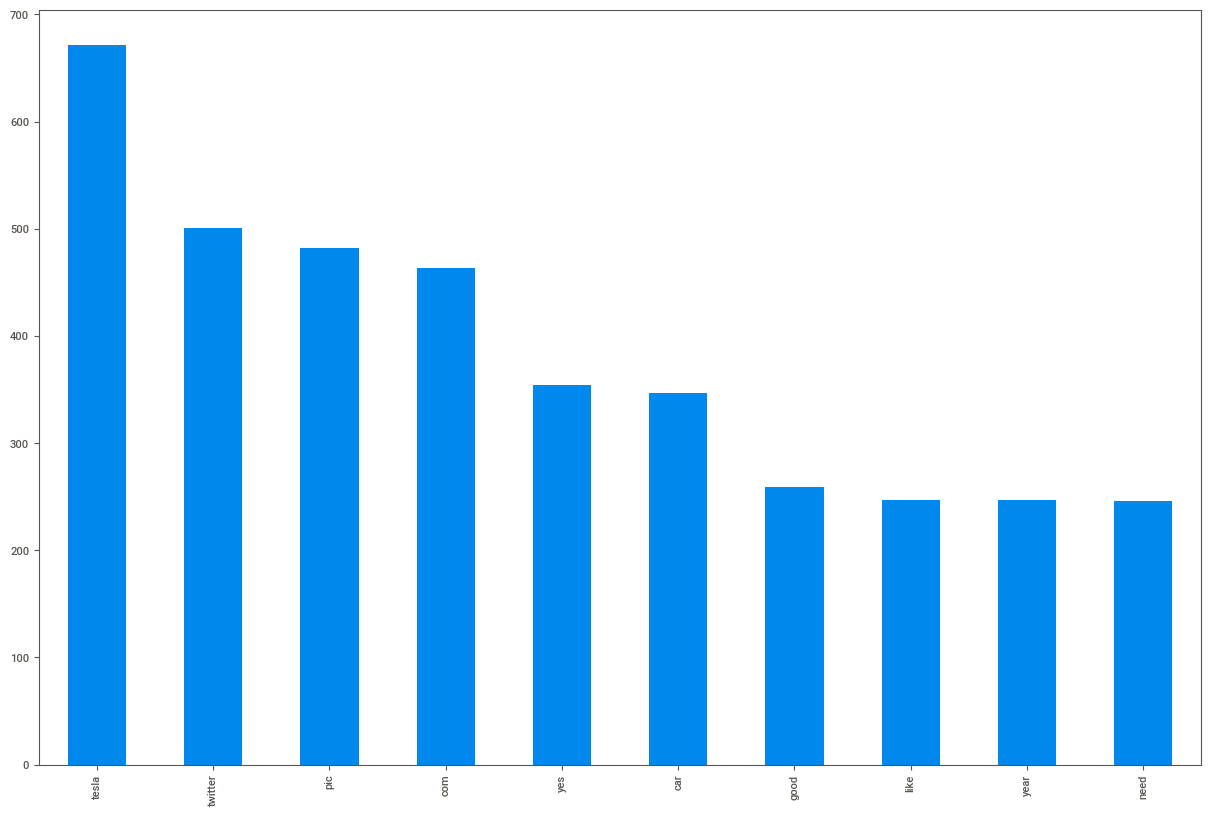

In [31]:
import matplotlib.pyplot as plt

# using top_words() method, get the top N words and make a bar plot.
hero.top_words(df1['clean_tweet']).head(10).plot.bar(figsize=(15,10))
plt.show()

In [38]:
# Want to add more stop words to your list? No problem. Follow the below steps.

from texthero import stopwords
default_stopwords = stopwords.DEFAULT
#add a list of stopwords to the stopwords
stop_w = ["twitter","pic","com","yes","like","year","need","ok","exact","come soon","yeah",
          "yup","would","much","use"]
custom_stopwords = default_stopwords.union(set(stop_w))
#Call remove_stopwords and pass the custom_stopwords list
df1['clean_tweet'] = hero.remove_stopwords(df1['clean_tweet'], custom_stopwords)

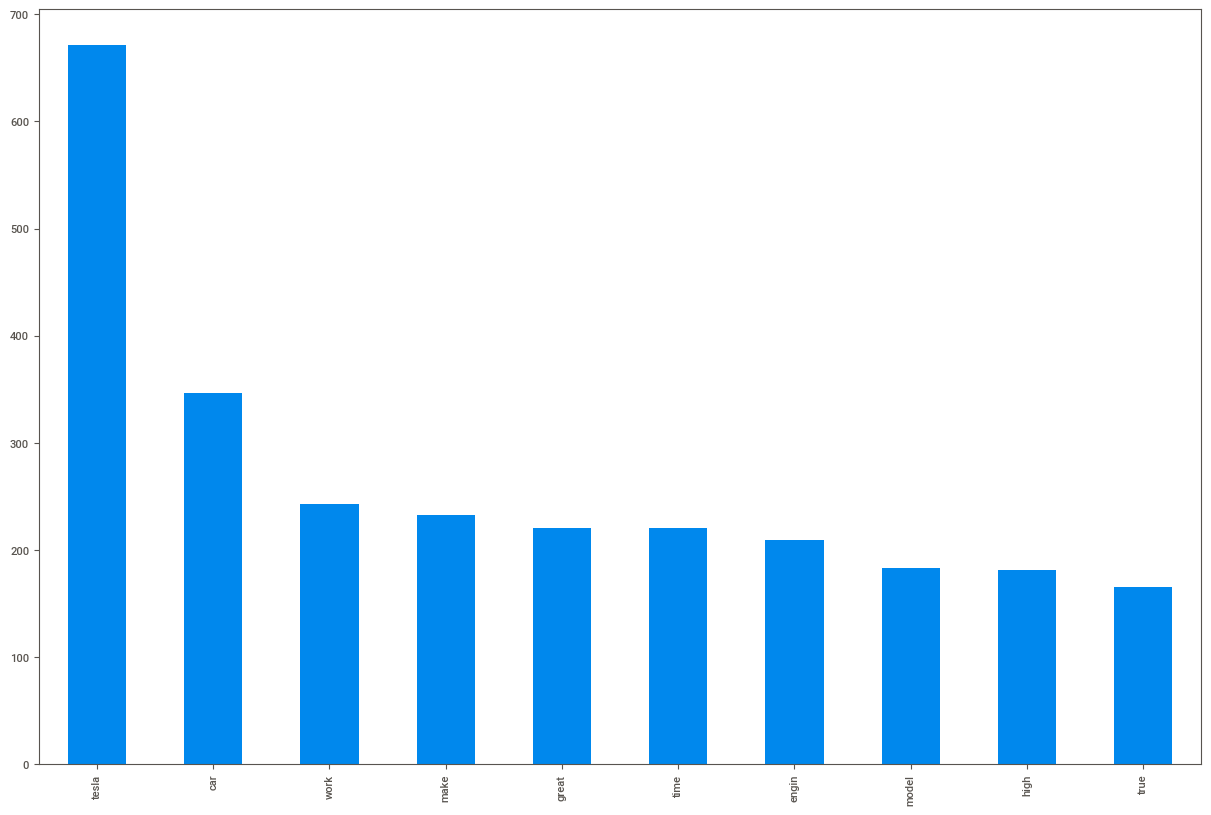

In [39]:
# Let's visualize again.

hero.top_words(df1['clean_tweet']).head(10).plot.bar(figsize=(15,10))
plt.show()

In [40]:
# just checking for any null values
df1.clean_tweet.isna().sum()

0

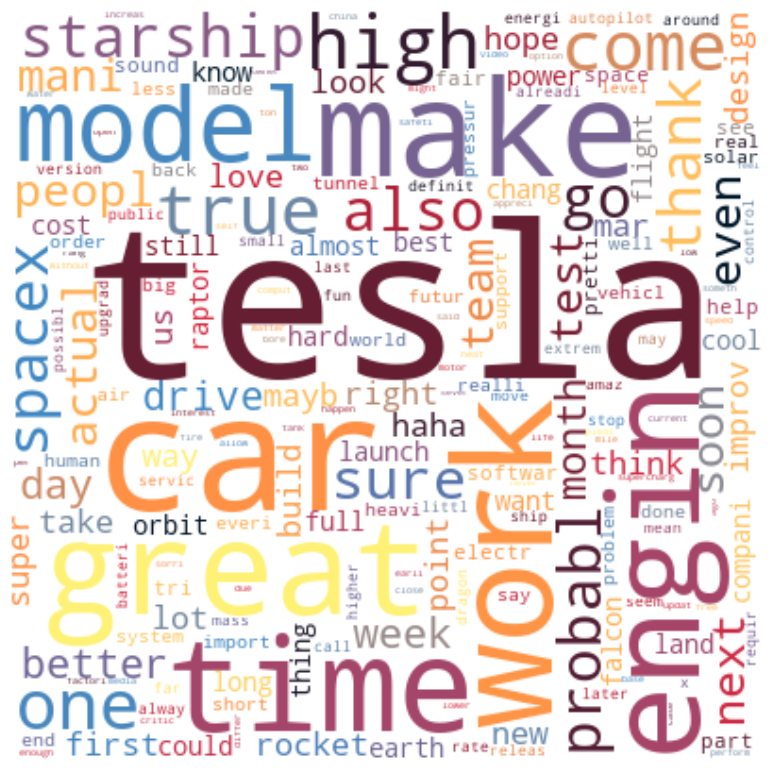

In [50]:
# WordCloud with single line of code.

hero.visualization.wordcloud(df1['clean_tweet'],width = 400, height= 400,background_color='White')

In [48]:
#Add pca value to dataframe to use as visualization coordinates
df1['pca'] = (
            df1['clean_tweet']
            .pipe(hero.tfidf,max_features=300)
            .pipe(hero.pca)
   )
#Add k-means cluster to dataframe 
df1['kmeans'] = (
            df1['clean_tweet']
            .pipe(hero.tfidf,max_features=300)
            .pipe(hero.kmeans, n_clusters=5)
   )
df1.head()

,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,reply_to,clean_tweet,pca,kmeans
datetime,,,,,,,,,,,
2020-07-13 07:56:31,"['teslatn', 'jgrano305', 'teslaratiteam', 'tes...",[],[],174,79,1255,[],"[{'user_id': '44196397', 'username': 'elonmusk...",plan supercharg public high power wall connec...,"[-0.016801384215164684, 0.009412578023271377]",0
2020-07-13 07:51:36,"['chrisjcav', 'jgrano305', 'teslaratiteam', 't...",[],[],80,31,755,[],"[{'user_id': '44196397', 'username': 'elonmusk...",,"[-0.0005226979862686329, -0.028064960548901934]",0
2020-07-13 07:50:20,"['jaminwestby', 'teslaownerssv', 'jgrano305', ...",[],[],77,33,889,[],"[{'user_id': '44196397', 'username': 'elonmusk...",think,"[-0.012367241298101435, -0.03278076546964253]",0
2020-07-13 07:49:54,"['jgrano305', 'teslaratiteam', 'teslarati']",[],[],58,87,1035,[],"[{'user_id': '44196397', 'username': 'elonmusk...",rang test number signific higher extrem ev es...,"[-0.011518377959173326, -0.023756041853948657]",0
2020-07-13 07:47:39,"['jgrano305', 'teslaratiteam', 'teslarati']",[],[],93,126,1275,[],"[{'user_id': '44196397', 'username': 'elonmusk...",reduc model lr dual motor offer lr singl moto...,"[-0.02292071686829566, 0.005034131811400713]",0


In [49]:
# Generate scatter plot for pca and kmeans. Cool isn't it?
hero.scatterplot(df1, 'pca', color = 'kmeans', hover_data=['clean_tweet'] )

# 7. Other Visualizations for further analysis

In [ ]:
!pip3 install chart-studio

In [ ]:
import seaborn as sns # visualization library
import chart_studio.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

In [53]:
df2 = df.drop(columns=['username','tweet','link'])

In [54]:
df2.head()

,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,reply_to,clean_tweet
datetime,,,,,,,,,
2020-07-13 07:56:31,"['teslatn', 'jgrano305', 'teslaratiteam', 'tes...",[],[],174,79,1255,[],"[{'user_id': '44196397', 'username': 'elonmusk...",yes plan supercharg public high power wall con...
2020-07-13 07:51:36,"['chrisjcav', 'jgrano305', 'teslaratiteam', 't...",[],[],80,31,755,[],"[{'user_id': '44196397', 'username': 'elonmusk...",
2020-07-13 07:50:20,"['jaminwestby', 'teslaownerssv', 'jgrano305', ...",[],[],77,33,889,[],"[{'user_id': '44196397', 'username': 'elonmusk...",think
2020-07-13 07:49:54,"['jgrano305', 'teslaratiteam', 'teslarati']",[],[],58,87,1035,[],"[{'user_id': '44196397', 'username': 'elonmusk...",rang test number signific higher extrem good e...
2020-07-13 07:47:39,"['jgrano305', 'teslaratiteam', 'teslarati']",[],[],93,126,1275,[],"[{'user_id': '44196397', 'username': 'elonmusk...",reduc price model lr dual motor offer lr singl...


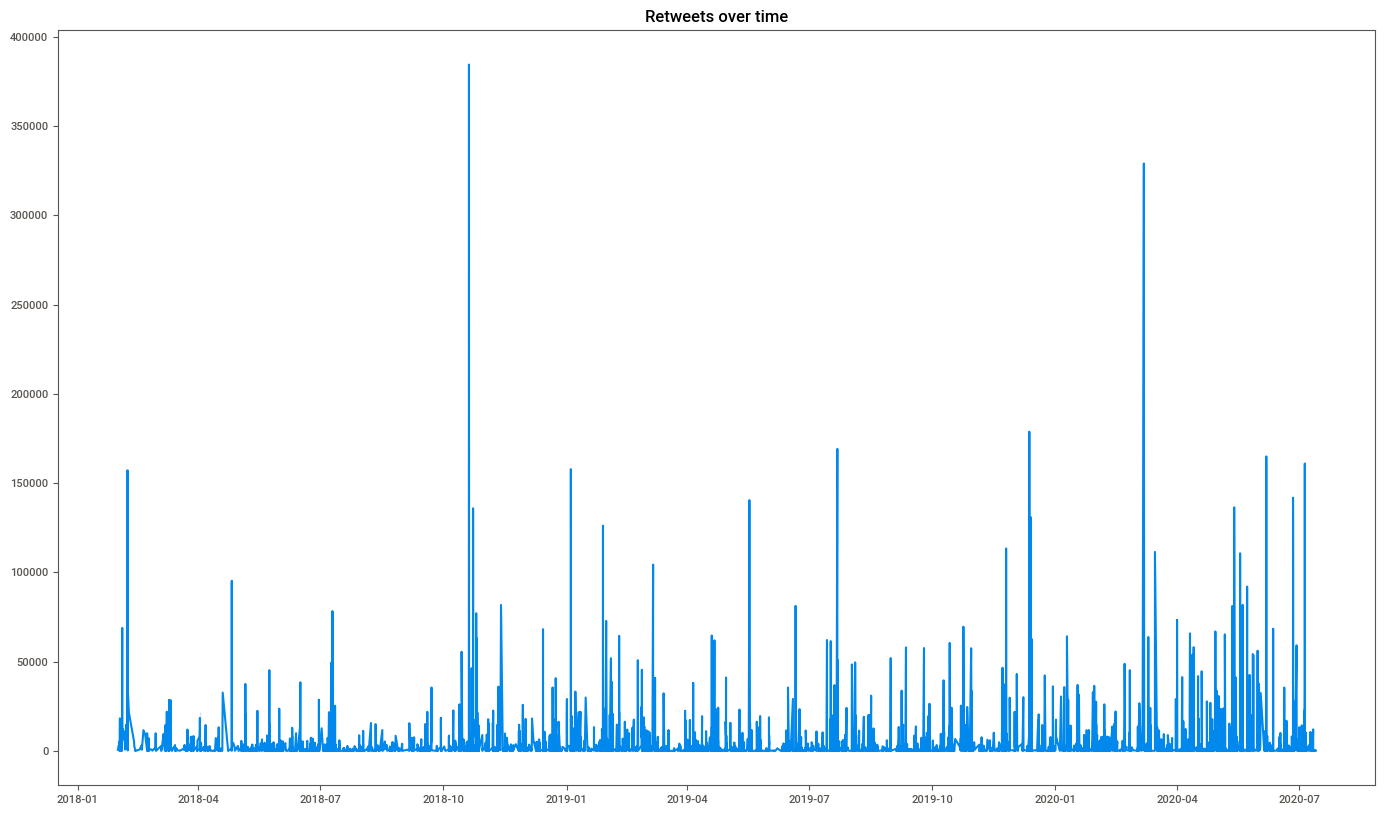

In [55]:
plt.figure(figsize=(17,10))
sns.lineplot(data=df2['retweets_count'], dashes=False)
plt.title("Retweets over time")
plt.show()

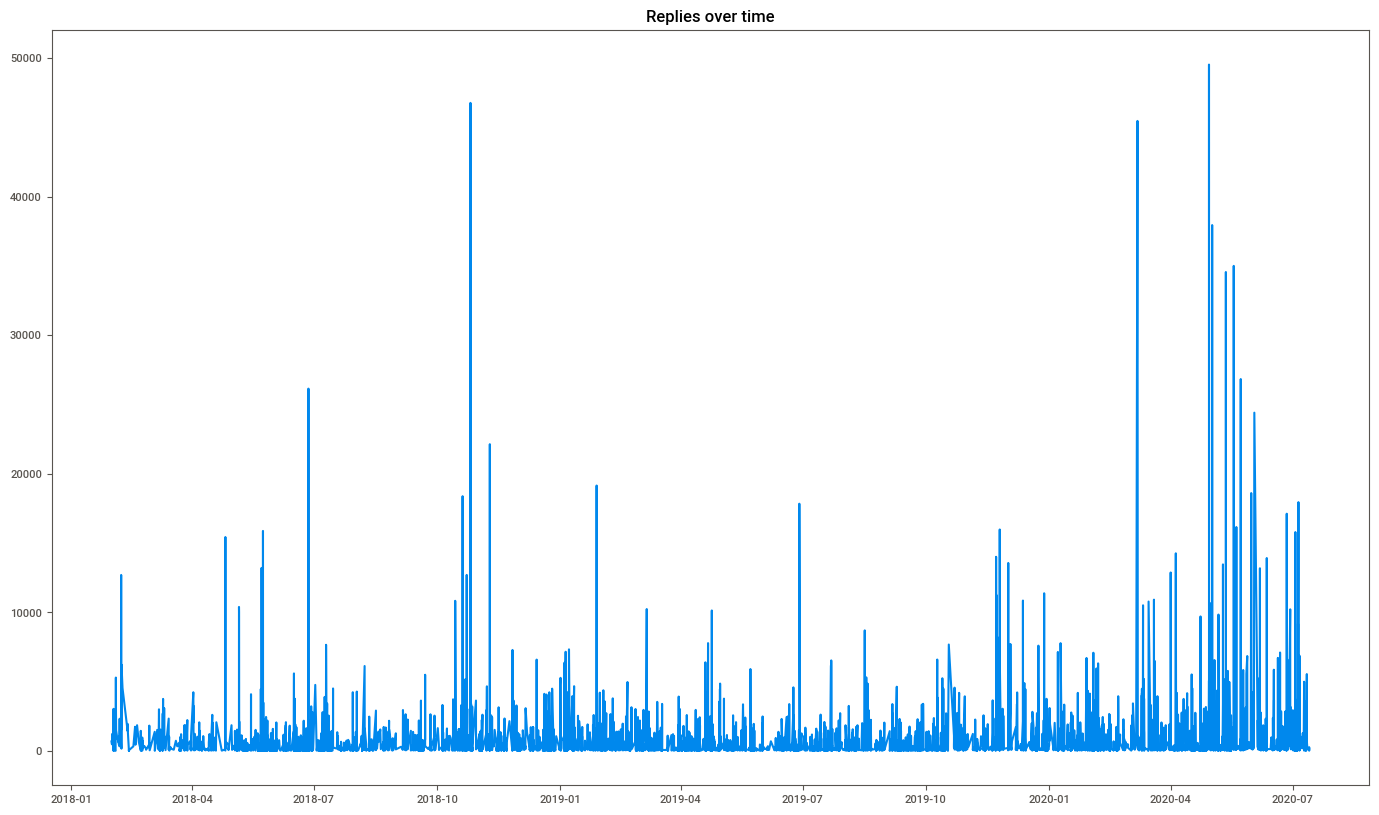

In [56]:
plt.figure(figsize=(17,10))
sns.lineplot(data=df2['replies_count'], dashes=False)
plt.title("Replies over time")
plt.show()

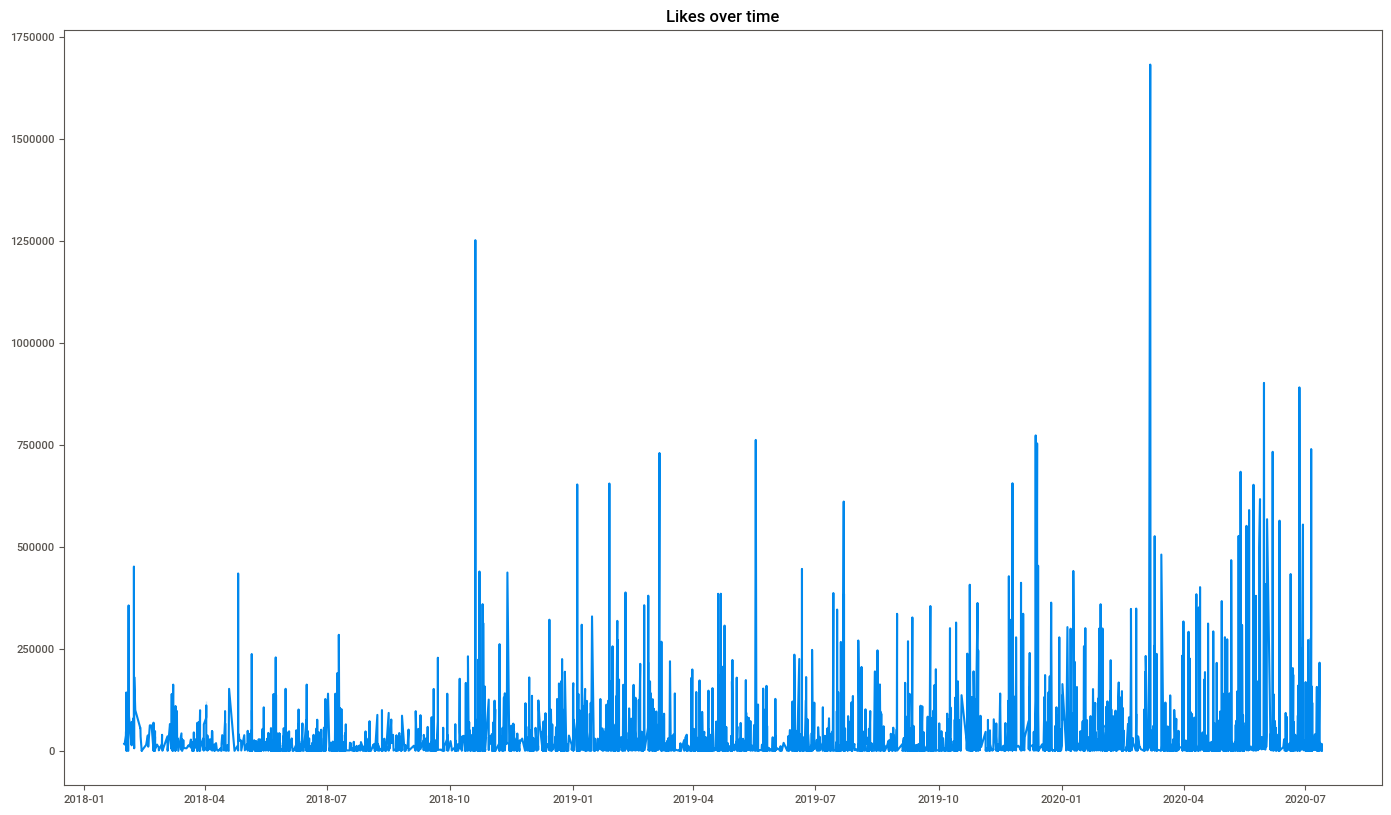

In [57]:
plt.figure(figsize=(17,10))
sns.lineplot(data=df2['likes_count'], dashes=False)
plt.title("Likes over time")
plt.show()

# What else?

You can check other libraries like [huggingface](https://github.com/huggingface) for NLP, [pendulum](https://github.com/sdispater/pendulum) if you're dealing with dates & time, and [Vaex](https://github.com/vaexio/vaex) if you're dealing with large datasets.

# Next Steps

- Build a Topic Model and check if you can categorize @elonmusk's tweets into different categories.
- Sentiment Analysis on his tweets
- How the sentiment is changing over time
- Take recent stocks data on TSLA and check if his tweets are influencing the TSLA stock or other stocks.

Please give a star for this repository if it helped you and raise issues if you find any. Thank you!